In [163]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../aeroComputing/lib/")
import pyvot

In [164]:
# set up knowns
Mi = 0.3
po = 1400000
pe = 100000
y = 1.4
R = 287
mdot = 3
To = 200+273.15

In [165]:
# get inlet static pressure
pi = po/(1+(y-1)/2*Mi**2)**(y/(y-1))

# get throat static pressure
pstar = po*(2/(y+1))**(y/(y-1))

# set up range of vals
p1s = np.arange(pi, pe, -50000)

In [166]:
# get Astar
Astar = mdot/((po/np.sqrt(R*To))*np.sqrt(y)*(1+(y-1)/2)**((y+1)/(2*(1-y))))

In [167]:
# get prat at each point
prat = [po/p1 for p1 in p1s]

# get mach at each point along pressure range
Ms = [np.sqrt((2*(pra**((y-1)/y) - 1))/(y-1)) for pra in prat]

# calculate the area at each point
As = [Astar/M*((1 + (y - 1)/2*(M**2))/((y + 1)/2))**((y + 1)/(2*(y - 1))) if M>0 else 0 for M in Ms]

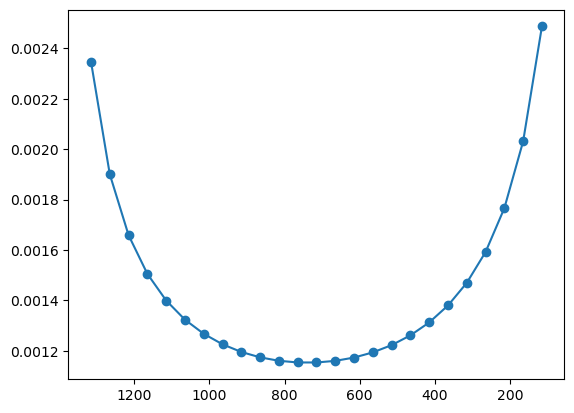

In [168]:
# plot area
plt.plot(p1s/1000, As, "-o")
plt.gca().invert_xaxis()
plt.show()

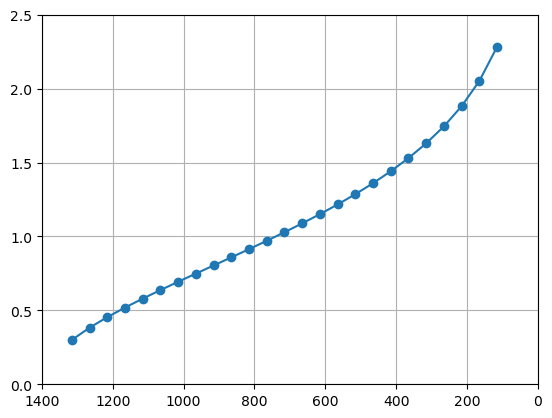

In [174]:
# plot machs
plt.plot(p1s/1000, Ms, "-o")
plt.gca().invert_xaxis()
plt.xlim([1400, 0])
plt.ylim([0, 2.5])
plt.grid()
plt.show()